In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import netCDF4 as nc4
import xarray as xr

In [2]:
ref = "refvf"
bvp = "bvpe3vf"

pstore ="/gpfsstore/rech/omr/ukd13rj/IGCM_OUT/NEMO/DEVT/clim/"
pdom = "netcdf_files/eORCA1.4.2_ModifStraits_domain_cfg.nc"

pref = pstore+"%s/OCE/Output/YE/%s_00500101_00501231_1Y_grid_W.nc" % (ref,ref)
pe3w = pstore+"%s/OCE/Output/YE/%s_00500101_00501231_1Y_grid_W.nc" % (bvp,bvp)

In [3]:
mm = nc4.Dataset(pdom)
botl = mm.variables['bottom_level'][0] # goes from 0 to 74 (75 levels)
glamt = mm.variables['glamt'][0] ; gphit = mm.variables['gphit'][0]

dref = nc4.Dataset(pref)
wo_ref = dref.variables['wo'][0] 

dbvp = nc4.Dataset(pe3w)
wo_bvp = dbvp.variables['wo'][0] 

nK,nJ,nI = np.shape(wo_bvp)

<ipython-input-4-f68275a07cc0>:7: UserWarning: Warning: converting a masked element to nan.
  wobref[j,i] = wo_ref[botl[j,i]-1,j,i]**2.
<ipython-input-4-f68275a07cc0>:8: UserWarning: Warning: converting a masked element to nan.
  wobbvp[j,i] = wo_bvp[botl[j,i]-1,j,i]**2.


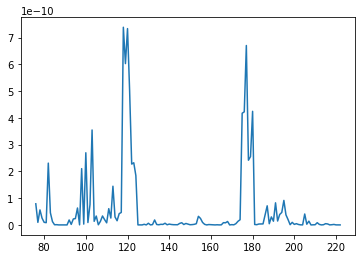

In [4]:
wobref = np.copy(wo_ref[-1])
wobbvp = np.copy(wo_bvp[-1])
ssmask = wo_ref.mask[0]

for i in range(nI):
    for j in range(nJ):
        wobref[j,i] = wo_ref[botl[j,i]-1,j,i]**2.
        wobbvp[j,i] = wo_bvp[botl[j,i]-1,j,i]**2.

plt.plot(wobref[:,i])

In [6]:
NI = 1 ; NJ = 3
N = 8
palette = plt.get_cmap('hot_r', N)
ppalette = plt.get_cmap('Reds', N//2) ; mpalette = plt.get_cmap('Blues', N//2)
#divpalette = plt.get_cmap('RdBu_r', N+1)


save = 1 ; psave = "woce.png" ; dpi = 1600

#vmax = np.max([np.nanmax(wobref),np.nanmax(wobbvp)])
vmax = 1e-8
vmin=1e-12

In [38]:
fig, ax = plt.subplots(NI,NJ, figsize=(NJ*3,NI*3), dpi = dpi, squeeze=False)

glamt = mm.variables['glamt'][0] ; gphit = mm.variables['gphit'][0]

from matplotlib.colors import LogNorm

cf = ax[0][0].imshow(wobref[::-1],
                     norm=LogNorm(vmin=vmin, vmax=vmax),
                     cmap = palette)

ax[0][1].imshow(wobbvp[::-1],
                     norm=LogNorm(vmin=vmin, vmax=vmax),
                     cmap = palette)

diff = wobbvp[::-1]-wobref[::-1]
diffp =   np.where(diff<0., 0., diff) # only positive 
diffm = - np.where(diff>0., 0., diff)

cd = ax[0][2].imshow(diffp, norm=LogNorm(vmin=vmin, vmax=vmax), cmap = ppalette)
ax[0][2].imshow(diffm, norm=LogNorm(vmin=vmin, vmax=vmax), cmap = mpalette)

for j in range(NJ):
    for i in range(NI):
        ax[i,j].patch.set_color('0.7')
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
        
plt.subplots_adjust(left=0.01, bottom=0.08, right=0.99, top=0.99, \
                    wspace=0.04, hspace=0.08) # h is height of L1 (NJ) and w is width of L2 (NI)

fig.colorbar(cf, ax=ax[0, :2], shrink=0.8, location='bottom',
                 aspect = 60, fraction=0.05,  extend = 'both', pad = 0.02)
fig.colorbar(cd, ax=ax[0,  2], shrink=0.8, location='bottom',
                 aspect = 30, fraction=0.05,  extend = 'both', pad = 0.02)

""" *************************** COLORBAR
"""
if save :
    print("\nsaving : %s" % psave)
    fig.savefig(psave, dpi = dpi)
    plt.close()
    print("figure closed")
plt.show()


saving : woce.png
figure closed


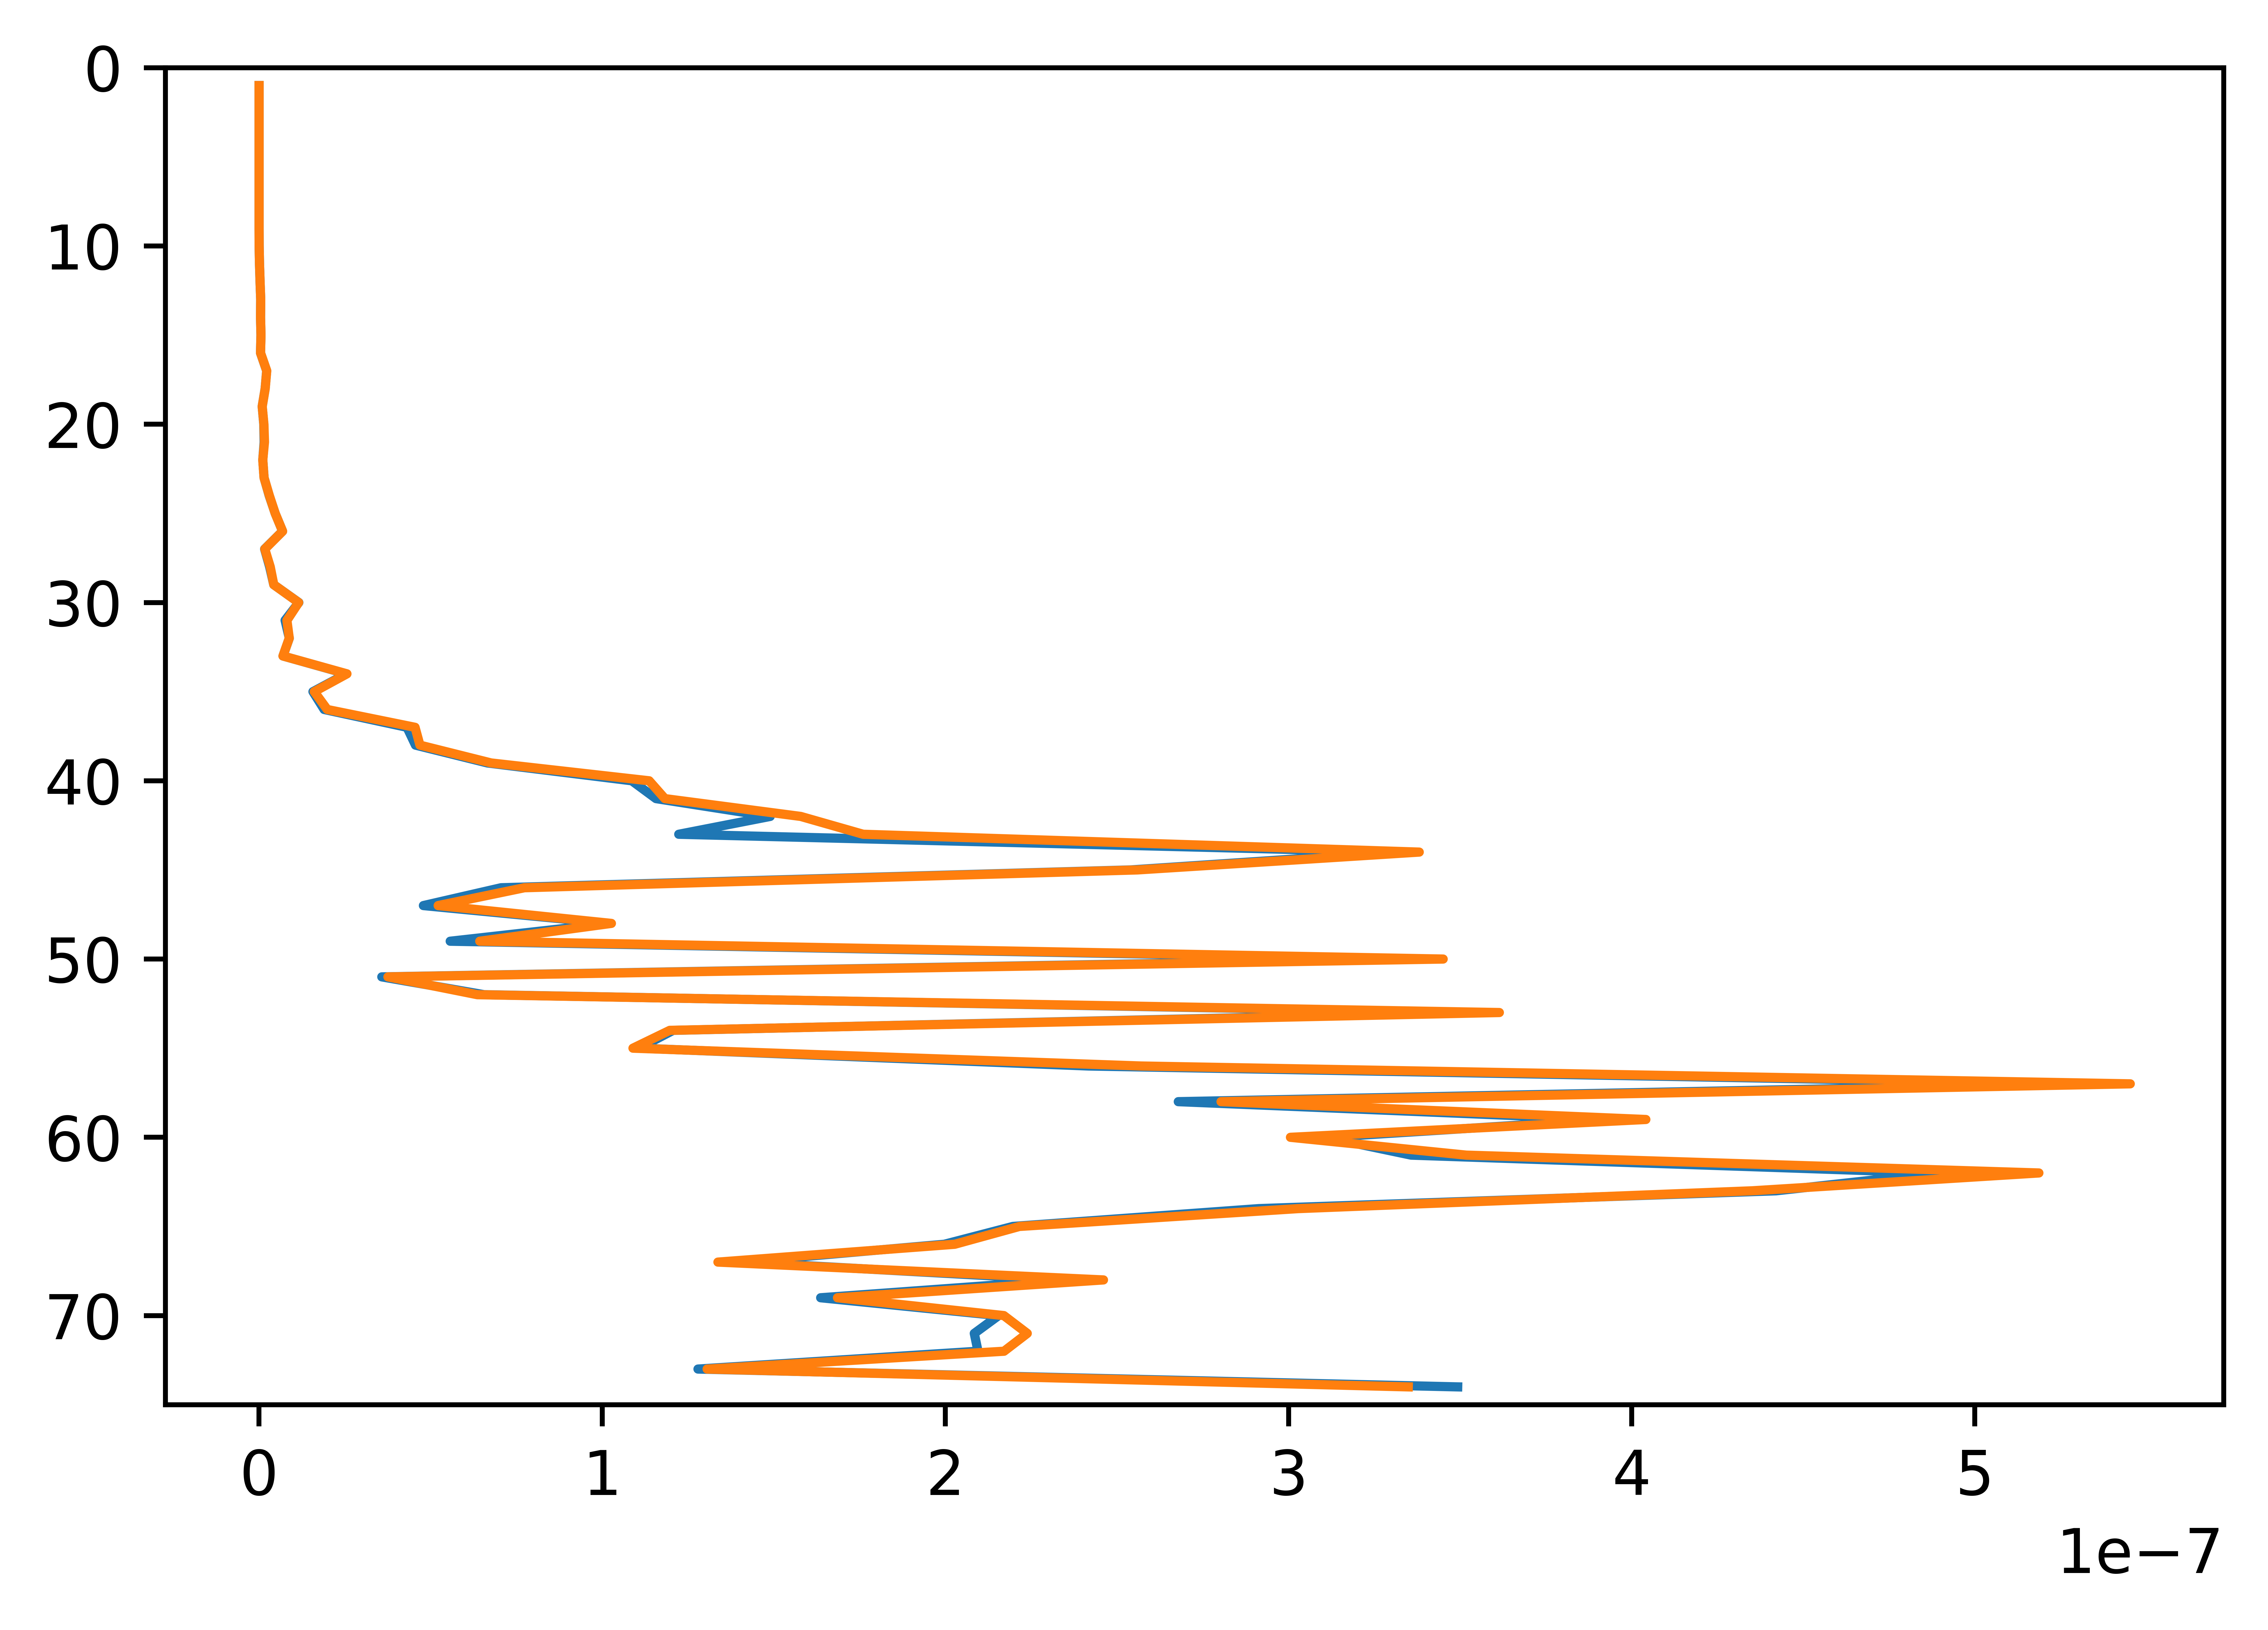

In [11]:
ref_dens = np.zeros((nK,)) ; bvp_dens = np.zeros((nK,))
kk = np.arange(nK)
for k in range(nK):
    jj,ii = np.where(botl==k)
    ref_dens[k]=np.sum(wobref[jj,ii])
    bvp_dens[k]=np.sum(wobbvp[jj,ii])

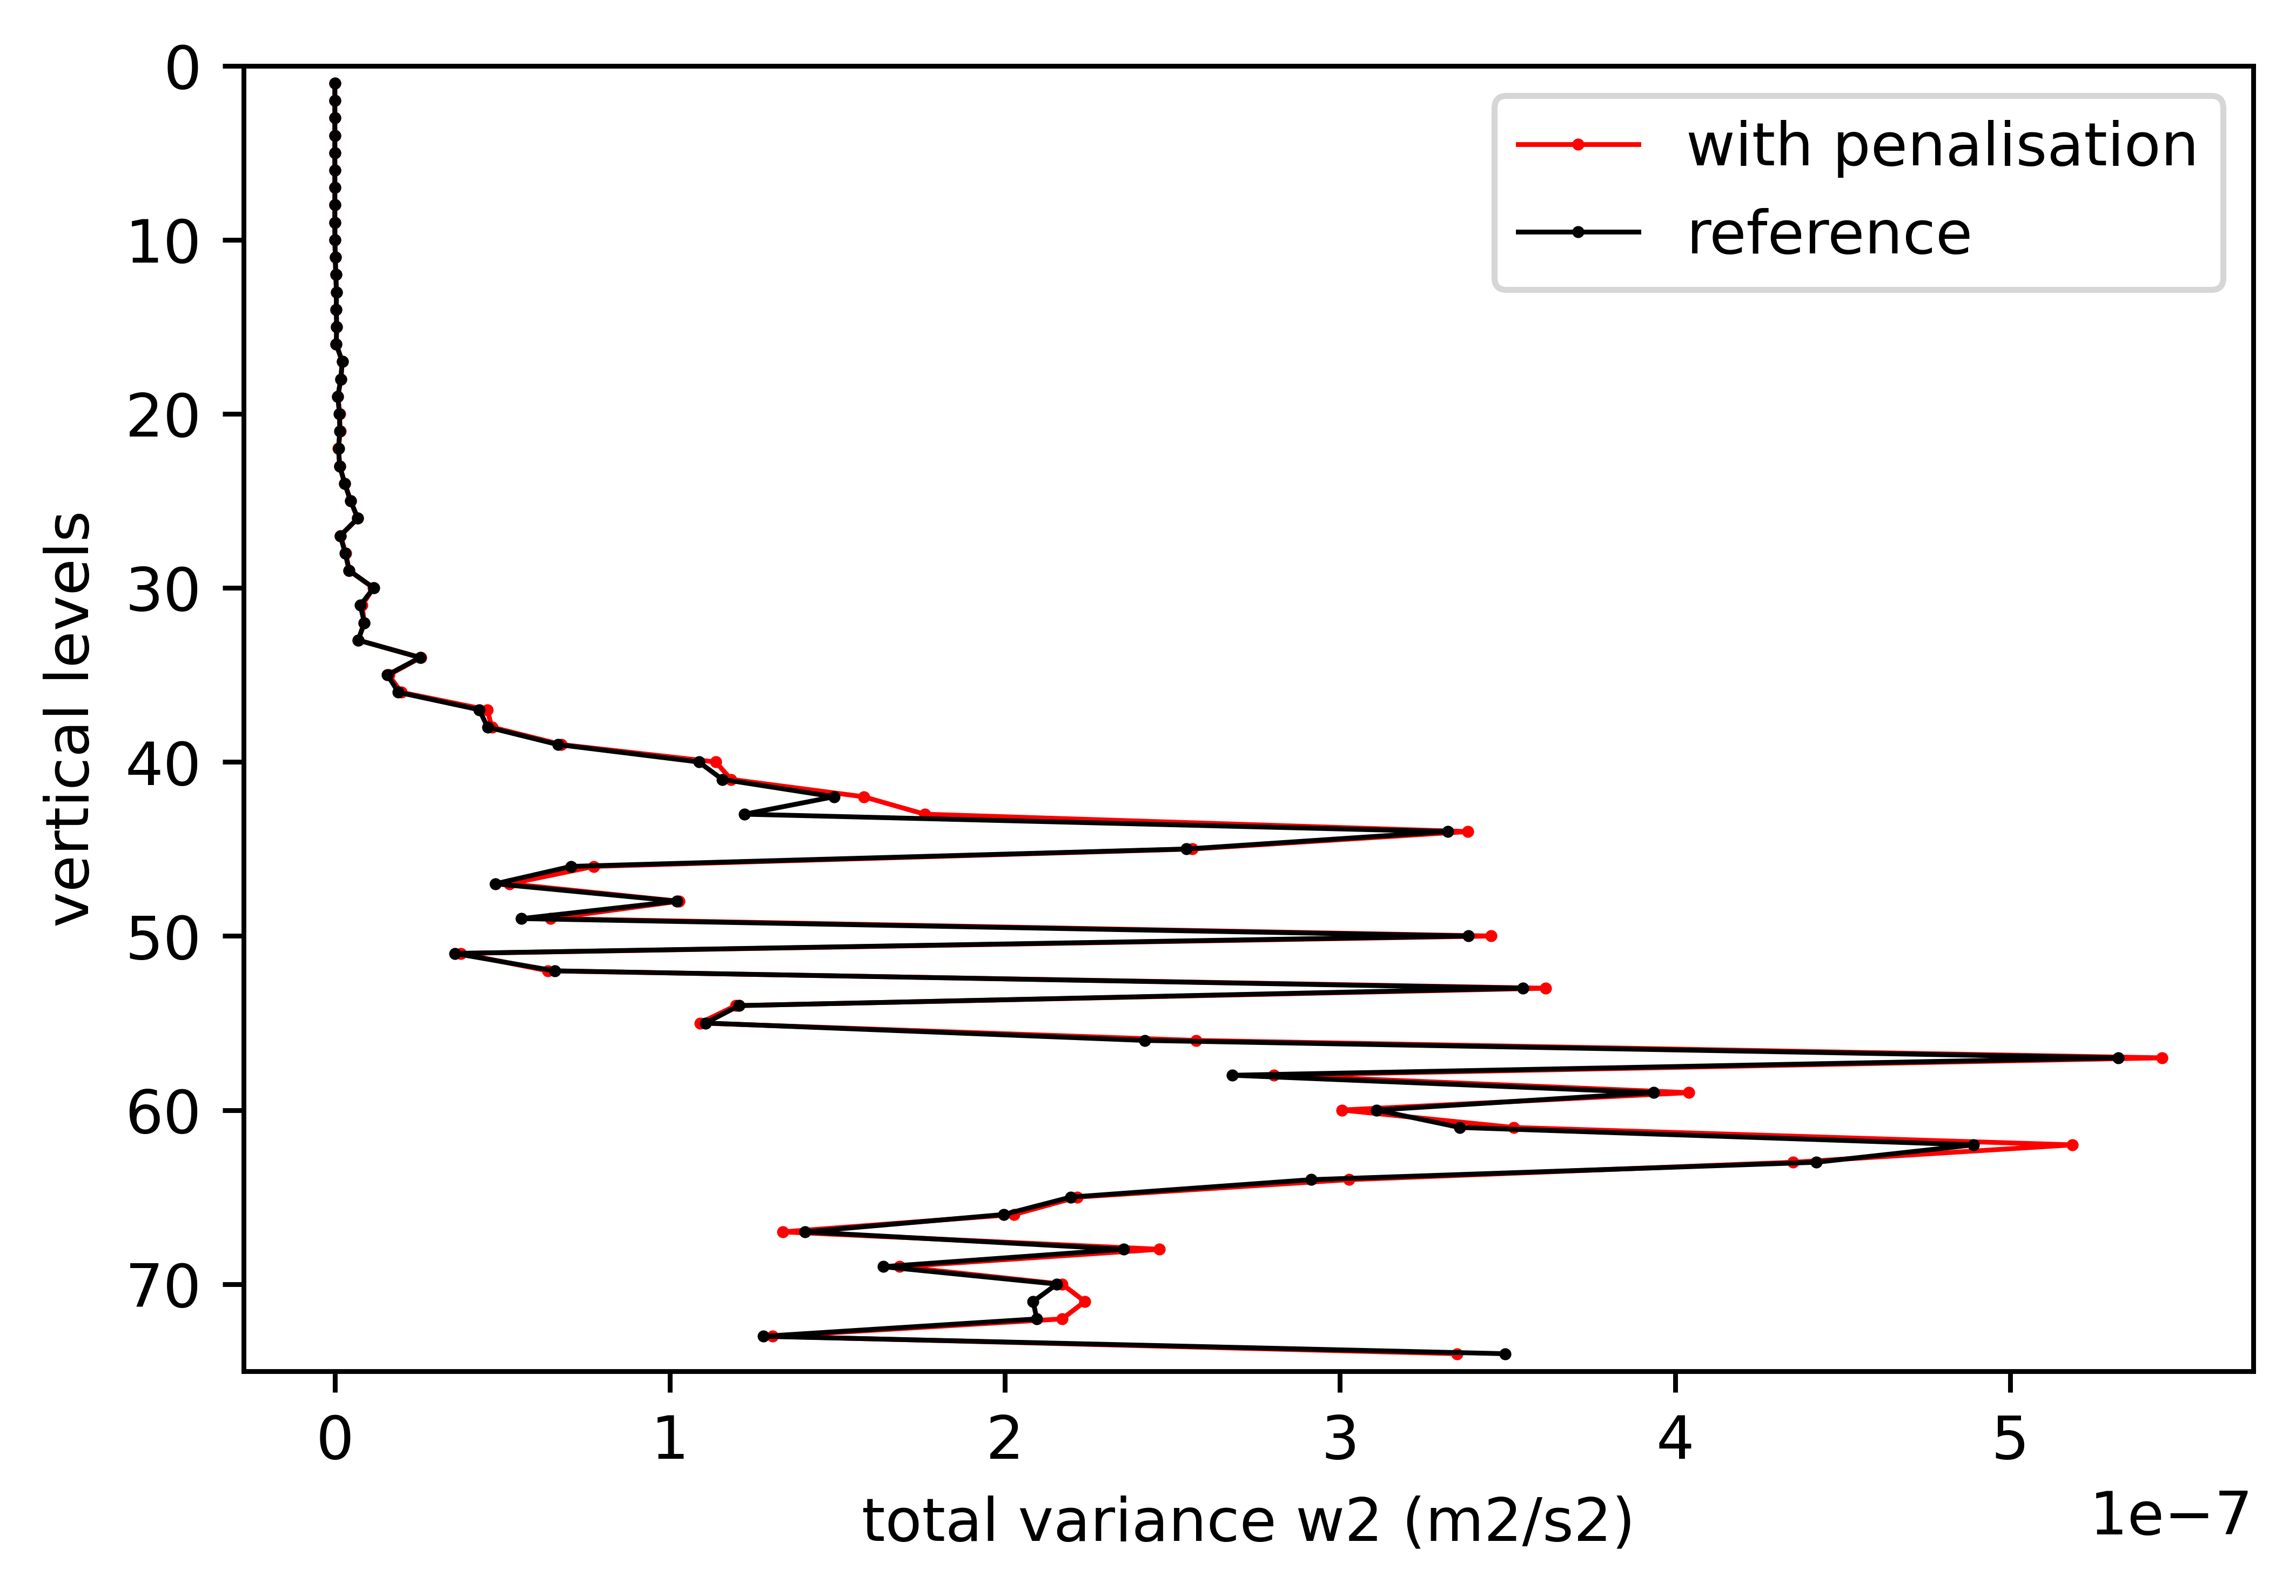

In [32]:
fig, ax = plt.subplots(1,1,dpi = 800)
kwargs = {"linewidth" : 0.8,"linestyle" : '-','marker' : 'o',"markersize" : 2, "markeredgewidth" : 0}

plt.plot(bvp_dens,kk,label="with penalisation", color="red"  , **kwargs)
plt.plot(ref_dens,kk,label="reference"        , color="black", **kwargs)
plt.ylim(nK,0)
plt.ylabel("vertical levels")
#ax.set_xscale('log')
#plt.xlim(0,6e-7)
plt.xlabel("total variance w2 (m2/s2)")

plt.legend()
#plt.show()
fig.savefig("distrib_woce.png", dpi = dpi)
print("figure closed")v

In [ ]:

#open dataset
dref = xr.open_dataset(pref)

# Turn on chunking to activate dask and parallelize read/write.
#ds = ds.chunk({'ocean_time': 1})

# Pick out some of the variables that will be included as coordinates
#dref = dref.set_coords(['nav_lat', 'nav_lon'])

# Select a a subset of variables. Salt will be visualized, zeta is used to
# calculate the vertical coordinate
variables = ['wo']

dref[:]

plt.figure(figsize=(6,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
# ax.set_extent([-170,170,-30,30])
ax.coastlines()
ax.contourf(lon2d, lat2d, datar, cmap = "jet")

## <matplotlib.contour.QuadContourSet object at 0x0000000012567588>

ax.gridlines(draw_labels=True, xlocs=np.arange(-180,180,30))

## <cartopy.mpl.gridliner.Gridliner object at 0x00000000125DDC48>

plt.show()